**Problem statement:

**Problem Definition¶
Predict the age of abalone mollusks based on the attributes.
Age is calculated by adding +1.5 to the number of rings.



**Features
The data consists of 9 features:


Sex (M-Male, F-Female, I-Infant)
Length (longest shell measurement)
Diameter (perpendicular to length)
Height (with meat in shell)
Whole weight (swhole abalone)
Shucked weight (weight of meat)
Viscera weight (gut weight after bleeding)
Shell weight (after being dried)
Rings (+1.5 gives the age in years

**Importing some necessary libraries

**Abalone is an edible mollusc of warm seas, with a shallow ear-shaped shell lined with mother-of-pearl and pierced with a line of respiratory holes. Also called ormer, ear shell. Abalones have long been a valuable food source for humans in every area of the world where a species is abundant. The meat of this mollusc is considered a delicacy in certain parts of Latin America (especially Chile), France, New Zealand, Southeast Asia, and East Asia (especially in China, Vietnam, Japan, and Korea).

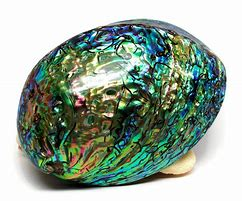
**AN IMAGE OF AN ABALONE

In [1054]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline

**Reading the csv file 

In [1055]:
data = pd.read_csv('abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**The infomation below shows there are no missing data in the dataset

In [1056]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**Showing the sum of  null data in each columns to be zero, respectively. 

In [1057]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

**Descriptive statistics of the numerical columns in the data set

In [1058]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


**List of columns in our dataset

In [1059]:
data.columns.tolist()

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

**The plot below shows that male abalone are dominant ,compared to their female counterparts. The males represent 36.5% of the entire population

M    36.581278
I    32.128322
F    31.290400
Name: Sex, dtype: float64


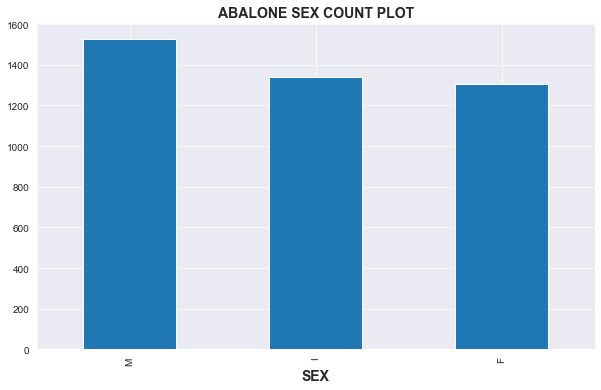

In [1060]:
plt.figure(figsize=(10,6))
data['Sex'].value_counts().plot(kind='bar');
plt.xlabel('SEX',fontweight='bold',fontsize=14)
plt.title('ABALONE SEX COUNT PLOT',fontweight='bold',fontsize=14)
print(data['Sex'].value_counts(normalize=True)*100)

**The scatter plot in this section shows that the lower part of the scatter plots represent infants abalone. As thier properties increases, they grow into either male or female. However , it is not feasible to determine the sex of abalones during infancy.

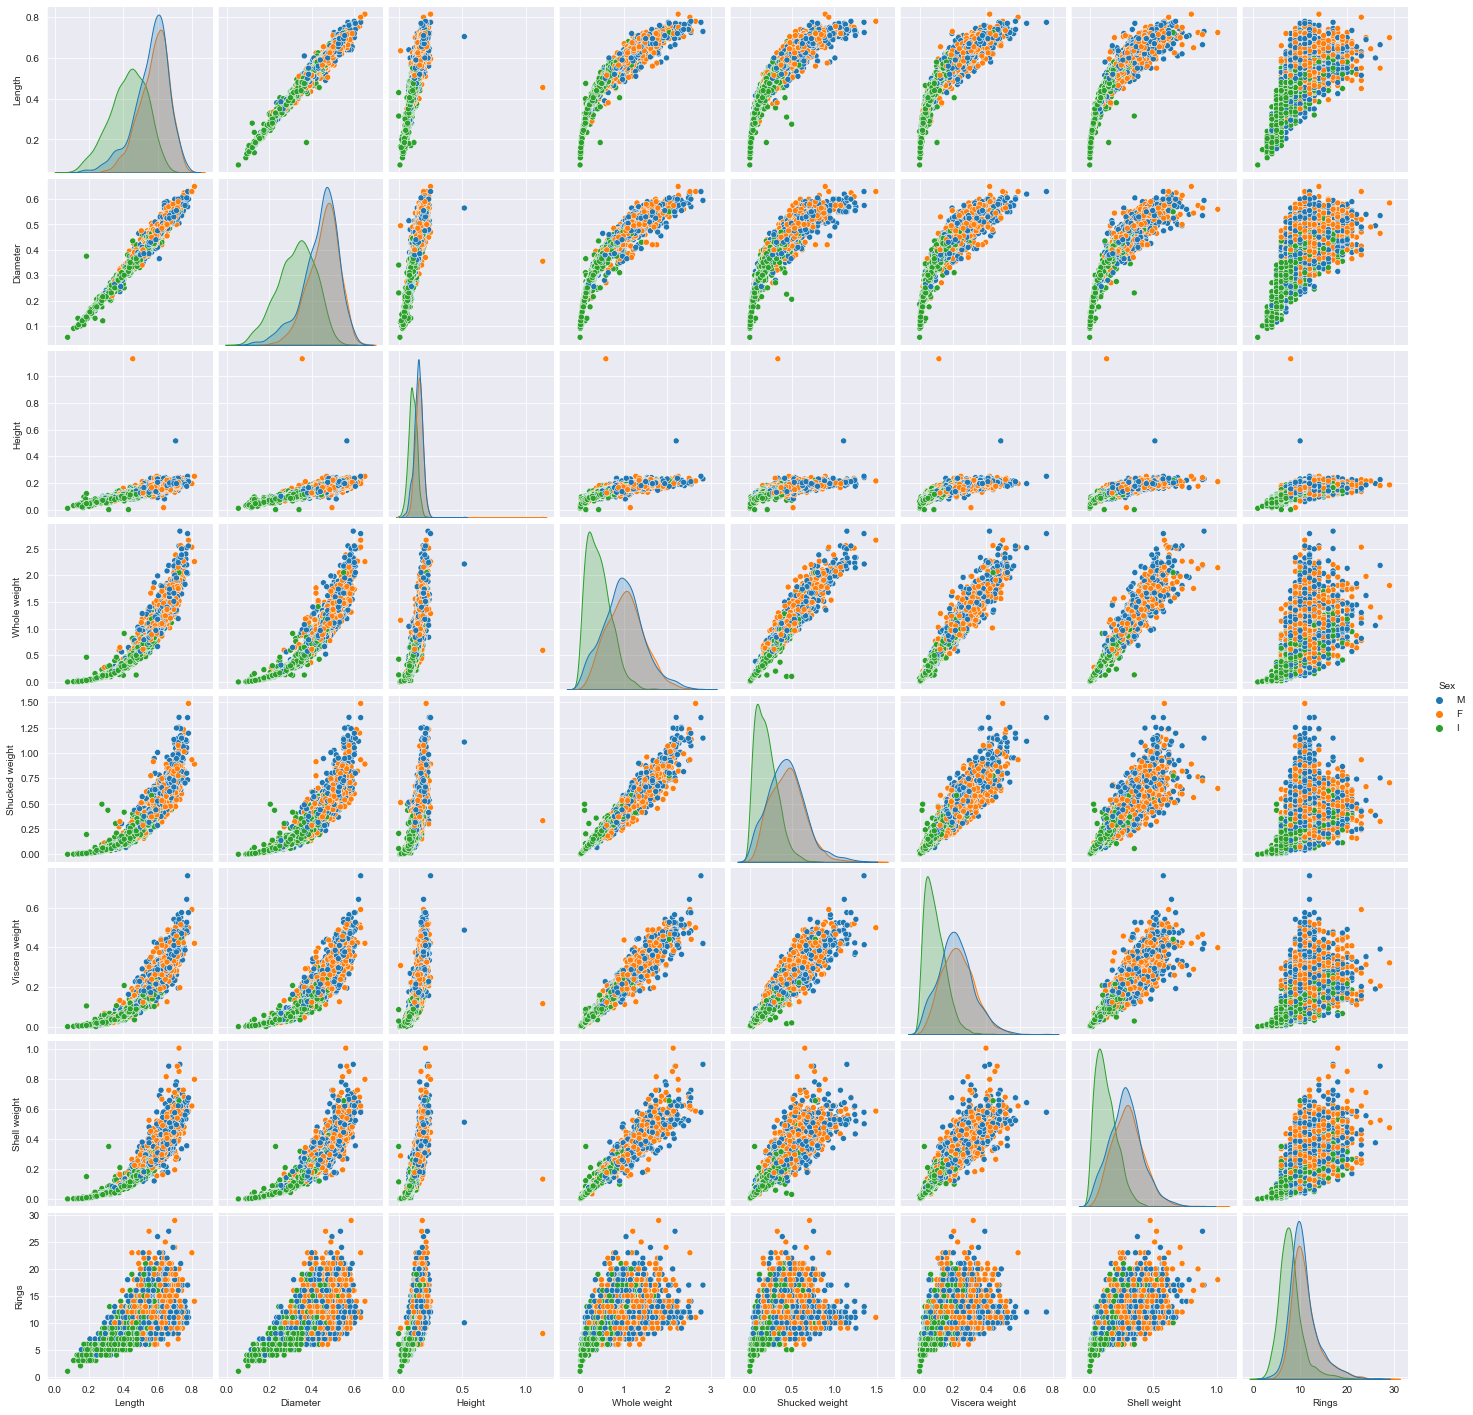

In [1061]:
sns.pairplot(data,hue='Sex');

In [1062]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Text(0.5, 1.0, 'Correlation Chart')

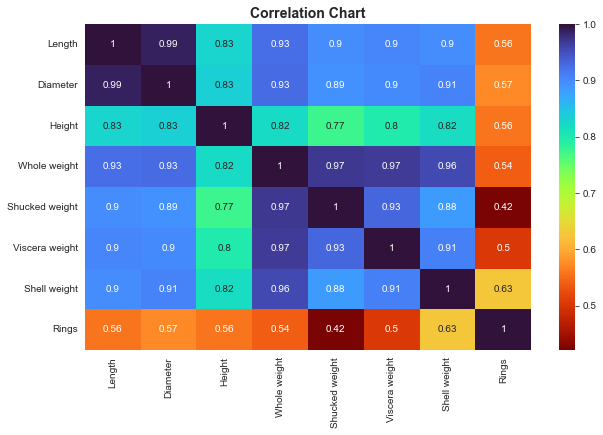

In [1063]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap='turbo_r',annot=True);
plt.title('Correlation Chart',fontweight='bold',fontsize=14)

**The above plot shows the correlation between the each columns with their corresponding values

Text(0.5, 1.0, 'Rings vs Whole weight Relationship plot')

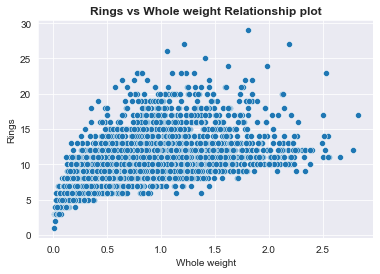

In [1064]:
sns.scatterplot(x=data['Whole weight'],y=data['Rings']);
plt.title('Rings vs Whole weight Relationship plot',fontweight='bold')

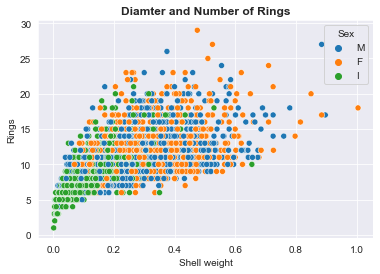

In [1065]:
sns.scatterplot(x=data['Shell weight'],y=data['Rings'],color='green',hue=data['Sex']);
plt.title('Diamter and Number of Rings',fontweight='bold');

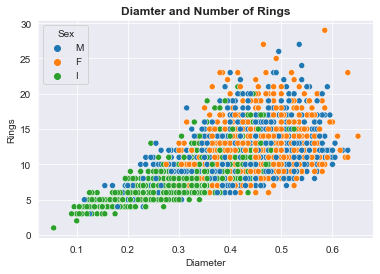

In [1066]:
sns.scatterplot(x=data['Diameter'],y=data['Rings'],color='green',hue=data['Sex']);
plt.title('Diamter and Number of Rings',fontweight='bold');

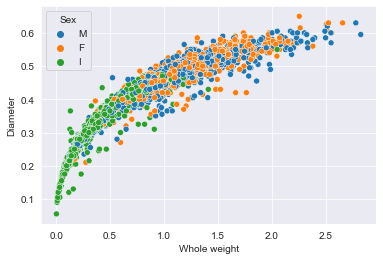

In [1067]:
sns.scatterplot(x=data['Whole weight'],y=data['Diameter'],color='red',hue=data['Sex']);

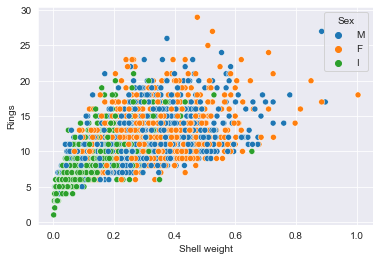

In [1068]:
sns.scatterplot(x=data['Shell weight'],y=data['Rings'],color='teal',hue=data['Sex']);

**The below boxplot shows the distribution of abalone gender based on their rings

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

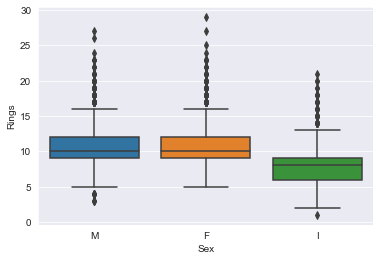

In [1069]:
sns.boxplot(x=data['Sex'],y=data['Rings'])

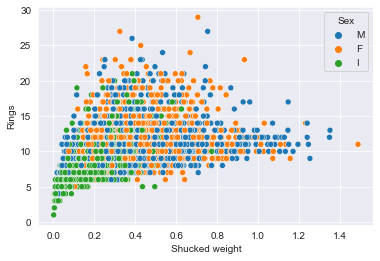

In [1070]:
sns.scatterplot(x=data['Shucked weight'],y=data['Rings'],color='red',hue=data['Sex']);

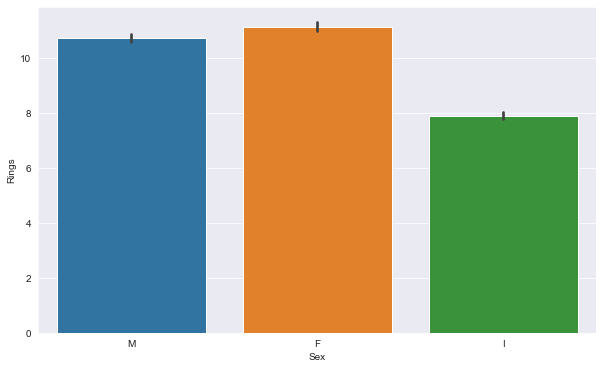

In [1071]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['Sex'],y=data['Rings']);

**Based on the provided features, female abalone seems to grow older than their male counterpart 

<BarContainer object of 4177 artists>

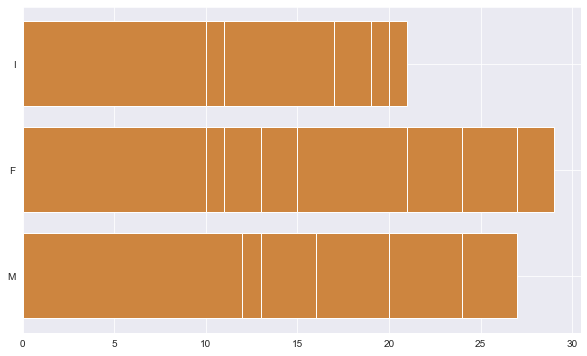

In [1072]:
plt.figure(figsize=(10,6))
plt.barh(data['Sex'],data['Rings'],color='peru')

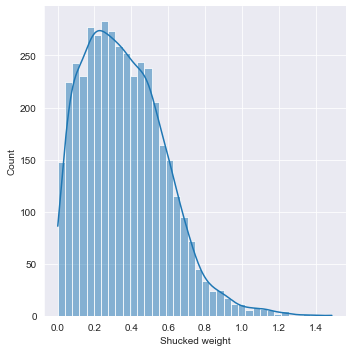

In [1073]:
sns.displot(x=data['Shucked weight'],kde=True);

**The shucked weight distribution appeared to be non symmetrical. It is positively skewed.

**The distribution plot of Diameter appears to be left skewed 

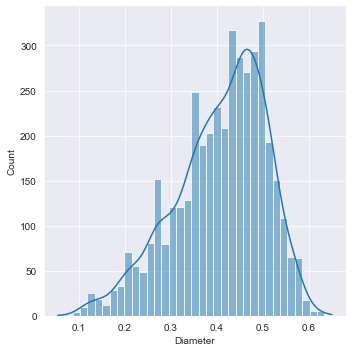

In [1104]:
sns.displot(x=data['Diameter'],kde=True);

In [1074]:
from sklearn.preprocessing import StandardScaler

In [1075]:
sc = StandardScaler()

**Encoding the numerical columns by calling pd.get_dummies on them

In [1076]:
data= pd.get_dummies(data)
data.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [1077]:
data['Age'] = data['Rings']+1.5

In [1078]:
data.drop(columns=['Rings'],axis=1,inplace=True)
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,8.5


**Splitting dataset into target and features

In [1079]:
X = data.iloc[:,0:10]

In [1080]:
y = data['Age']

In [1081]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,accuracy_score
from sklearn.metrics import mean_squared_error

In [1082]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor

**Segregating the dataset into training and testing dataset

In [1083]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

**List of all regression algorithms to be used 

In [1084]:
models = {'linear_regression':LinearRegression(),
         
         'decision_tree':DecisionTreeRegressor(random_state=1),
         
         'random_forest':RandomForestRegressor(random_state=1),
         
         'xgboost':XGBRegressor(random_state=1),
        }

**Defining the hyperparameters of each algorithm

In [1107]:
# Linear regression
lr_params = {'fit_intercept':[True,False]}

# Decision tree
dt_params =  {'max_depth': [4, 6, 8, 10, 12, 14, 16, 20],
            'min_samples_split': [5, 10, 20, 30, 40, 50],
            'max_features': [0.2, 0.4, 0.6, 0.8, 1],
            'max_leaf_nodes': [8, 16, 32, 64, 128,256]}

# Random Forest
rf_params = {'bootstrap': [True, False],
             'max_depth': [2, 5, 10, 20, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [100, 150, 200, 250],
            'criterion':['mse','mae']}

# XGBoost
xgb_params = {'n_estimators':[100, 200, 300] , 
             'max_depth':list(range(1,10)) , 
             'learning_rate':[0.006,0.007,0.008,0.05,0.09] ,
             'min_child_weight':list(range(1,10))}

In [1108]:
params = [lr_params, dt_params, rf_params, xgb_params]

In [1109]:
from sklearn.model_selection import RandomizedSearchCV

**RandomizedSearchCV is used to select the best parameters for each algorithm. This is to ensure a good optimization of our
model.

In [1110]:
i=0
for name, model in models.items():
    print(name)
    regressor = RandomizedSearchCV(estimator = model,
                                   n_iter=10,
                                   param_distributions = params[i],
                                   cv = 3,
                                   scoring = 'neg_root_mean_squared_error')
    
    search = regressor.fit(X_train, y_train)
    
    print('Best params :',search.best_params_)
    print("RMSE :", -search.best_score_)
    i+=1
    print()

linear_regression
Best params : {'fit_intercept': False}
RMSE : 2.2262162849075326

decision_tree


C:\Users\Public\Desktop\python\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params : {'min_samples_split': 40, 'max_leaf_nodes': 16, 'max_features': 0.6, 'max_depth': 20}
RMSE : 2.4309002830605078

random_forest
Best params : {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'mse', 'bootstrap': True}
RMSE : 2.1660221774888933

xgboost
Best params : {'n_estimators': 300, 'min_child_weight': 4, 'max_depth': 3, 'learning_rate': 0.09}
RMSE : 2.153783837731876



In [1111]:
rf_params = {'n_estimators': 200, 
             'min_samples_split': 2,
             'min_samples_leaf': 4, 
             'max_features': 'sqrt', 
             'max_depth': None, 
             'bootstrap': True}

model = RandomForestRegressor(random_state=1, **rf_params)

model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4, n_estimators=200,
                      random_state=1)

**Random forest is found to be good for our model, as it is being evaluated by RMSE. Random forest algorithm has the small RMSE among all

In [1112]:
y_pred_train= model.predict(X_train)
y_pred_train

array([10.81835052, 12.58479285, 12.05381024, ..., 11.68406793,
       10.92721211, 10.16498258])

In [1113]:
r2_score(y_train,y_pred_train)

0.7725781528816855

**Training data score is about 77.3%. 77.3% of the depent variable is being accounted for by the indepandent variables.
    ** This score shows that our model has learned well from our data and does not overfits

In [1114]:
y_pred_test= model.predict(X_test)
y_pred_test

array([13.72096507, 10.92034693, 15.92550906, ..., 13.03243362,
       13.40634077, 11.01769657])

In [1115]:
r2_score(y_test,y_pred_test)

0.5656925640276023

**Testing score is about 57.0%. 57.0% of the depent variable is being accounted for by the indepandent variables. This is not the best though, but it is moderate
**This score shows that our model can

**XGBOOST algorithm.

In [1126]:
xg = XGBRegressor(n_estimators=100,min_chid_weight=7,max_depth=4,learning_rate=0.09)
xg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_chid_weight=7, min_child_weight=None,
             missing=nan, monotone_constraints=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, predictor=None,
             random_state=None, reg_alpha=None, ...)

In [1127]:
xg.fit(X_train,y_train)

[00:04:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_chid_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.09, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_chid_weight=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [1128]:
y_pred_xg = xg.predict(X_test)
y_pred_xg

array([13.582833, 11.19966 , 16.108362, ..., 13.610896, 13.754297,
       11.144805], dtype=float32)

In [1129]:
y_train_pred_xg = xg.predict(X_train)
y_train_pred_xg

array([11.144988, 12.521237, 12.300976, ..., 11.381904, 10.944018,
       10.836126], dtype=float32)

In [1130]:
r2_score(y_train,y_train_pred_xg)

0.7135655703390902

In [1131]:
r2_score(y_test,y_pred_xg)

0.5351984781243566

**Feature importance of each independent variables

In [1132]:
importance_df = model.feature_importances_
importance_df

array([0.07343251, 0.1054301 , 0.12903035, 0.12847157, 0.12719263,
       0.1024731 , 0.2979587 , 0.00913342, 0.01977506, 0.00710258])

In [1133]:
new_df = pd.DataFrame({'Features':X_train.columns,'importance':importance_df}).sort_values('importance',ascending=True)
new_df

,Features,importance
9,Sex_M,0.007103
7,Sex_F,0.009133
8,Sex_I,0.019775
0,Length,0.073433
5,Viscera weight,0.102473
1,Diameter,0.105430
4,Shucked weight,0.127193
3,Whole weight,0.128472
2,Height,0.129030
6,Shell weight,0.297959


**The below plot shows that the shell weight of abalones contribute to their age

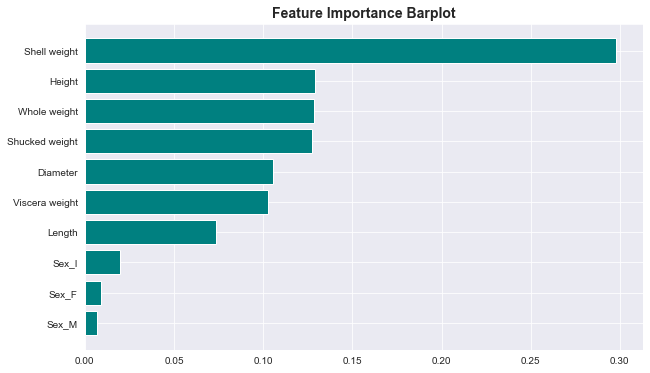

In [1124]:
plt.figure(figsize=(10,6))
plt.barh(new_df['Features'],new_df['importance'],color='teal');
plt.title('Feature Importance Barplot',fontweight='bold',fontsize=14);

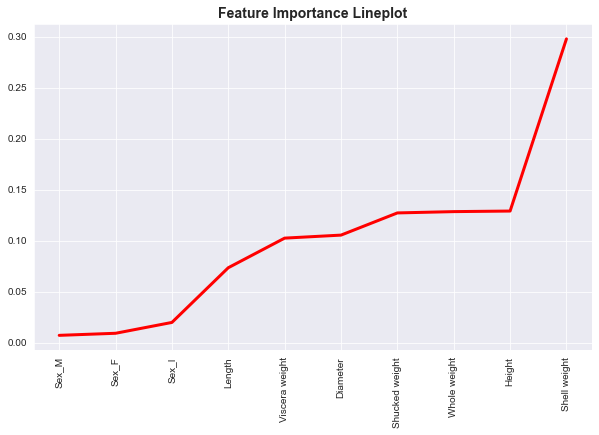

In [1136]:
plt.figure(figsize=(10,6))
plt.plot(new_df['Features'],new_df['importance'],color='red',lw=3);
plt.title('Feature Importance Lineplot',fontweight='bold',fontsize=14)
plt.xticks(rotation=90);

# Conclusion:
**Female abalones are older than thier male counterparts because their rings are more than the males
**Although the independent variables such as weight does not account for the age, because other factors could have affected the weight and diameter of the abalones. Factors like weather conditions and food availability.
**The sex of the abalones are not determined when they are still in infancy statge as seen on the scatter plot. The increase in diameter, weight other features help to classify into males and females based ring number.

**The manual determination of abalones'age is kinda tedious. Each shell has to be cut in a cone, stained and counting the number of rings in their shell through a microscope shows thier age. This model was developed to help predict the age of abalones based on their features. It is useful for research centres, as well as sea food ventures to better increase their revenue. For example, the shucked weight which the meat size can control the price of each snail. 